# Shermeen Khan
# CIS 4170 - MatPlotLib Dashboard
# Professor Anna O'Connell

## Dataset: https://www.kaggle.com/shivamb/netflix-shows

## Description: This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In [ ]:
#installing all necessary packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### Through this dashboard, I'd like to understand more about the Netflix Content. I want to see the following:
#### - What type of content does Netflix have more of?
#### - How much content was released by year?
#### - What is the percentage of content released by year?
#### - What are the number of movies and tv shows produced by year? 
#### - Which country has the most number of produced content?
#### - What MPAA rating is the most common across the Netflix offerings?
#### - What director has the most content on Netflix?
#### - When was the most Netflix content produced?
#### - Which countries produce Netflix content?
#### - How are MPAA ratings distributed throughout the years?

In [ ]:
#Reading in all of the data

netflix = pd.read_csv('netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Change the date time to make sure it is allowed to process through

netflix["date_added"] = pd.to_datetime(netflix["date_added"])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Checking what data is null

netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Taking care of missing values

netflix.date_added.fillna("unknown",inplace= True)
netflix.country.fillna("unknown", inplace = True)

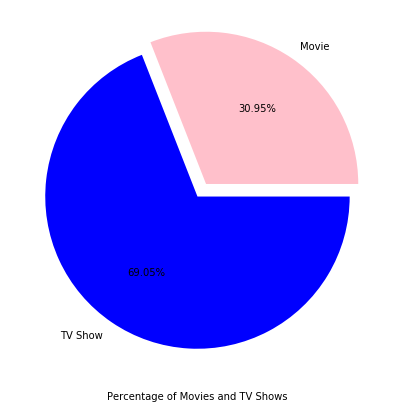

In [ ]:
#Let's see the proportion of movies to TV-shows and understand which content Netflix has more of.

plt.figure(figsize=(10,7))
plt.pie(netflix['type'].value_counts().sort_values(),labels=netflix['type'].value_counts().index,explode=[0.10,0],
        autopct='%1.2f%%',colors=['Pink','Blue'])
plt.xlabel('Percentage of Movies and TV Shows')
plt.show()

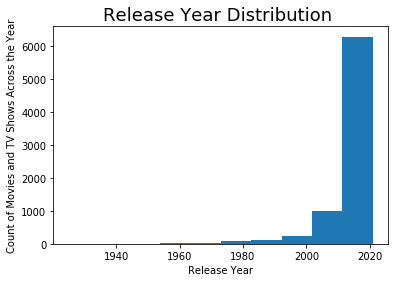

In [ ]:
#Using histogram to find the distribution of content across the years

plt.hist(netflix['release_year'])
plt.xlabel("Release Year")
plt.ylabel("Count of Movies and TV Shows Across the Year")
plt.title('Release Year Distribution ', fontsize=18)
plt.show()

Text(0, 0.5, 'Frequency')

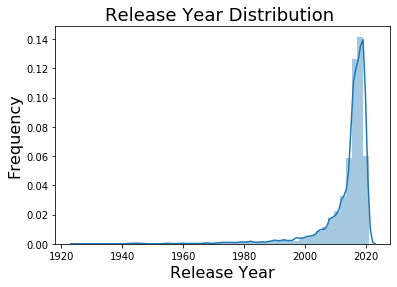

In [ ]:
#This histogram and KDE plot looks at the distribution by percentage of where the most content occurs 

sns.distplot(netflix['release_year'])
plt.title('Release Year Distribution ', fontsize=18)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0.5, 1.0, 'Count of the Type of Content Released')

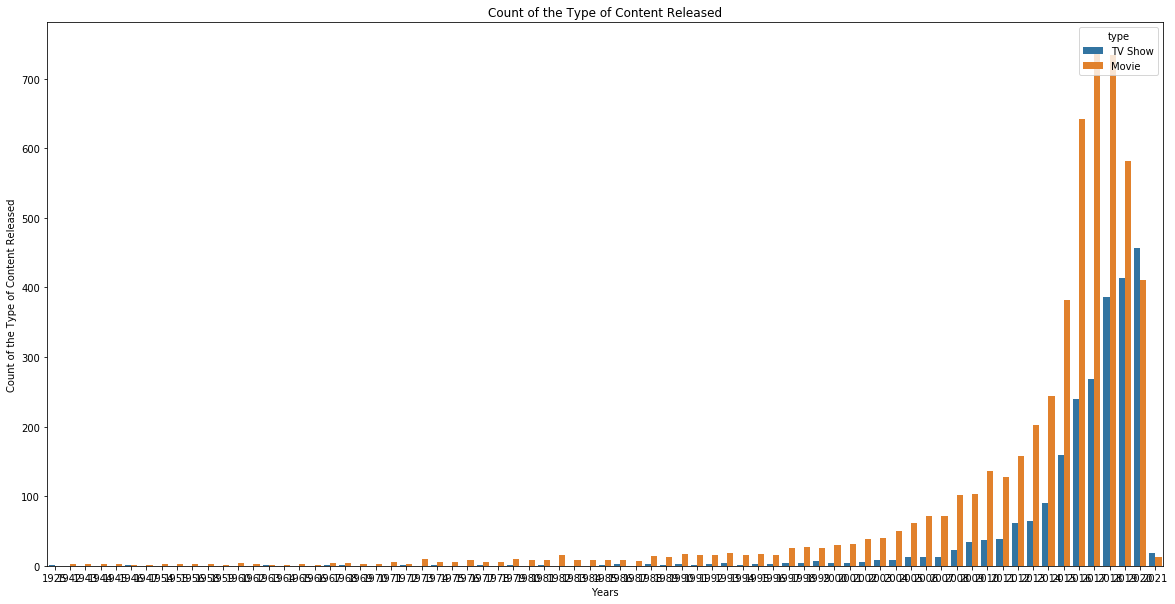

In [ ]:
#I will combine the 2 plots above to see the content released by year over the past few years.
#Here we can see that 

plt.figure(figsize=(20,10))
diagram = sns.countplot(x=netflix["release_year"],hue="type",data=netflix)
diagram.set_xlabel("Years")
diagram.set_ylabel("Count of the Type of Content Released")
plt.title('Count of the Type of Content Released')

Text(0, 0.5, 'Number of Country')

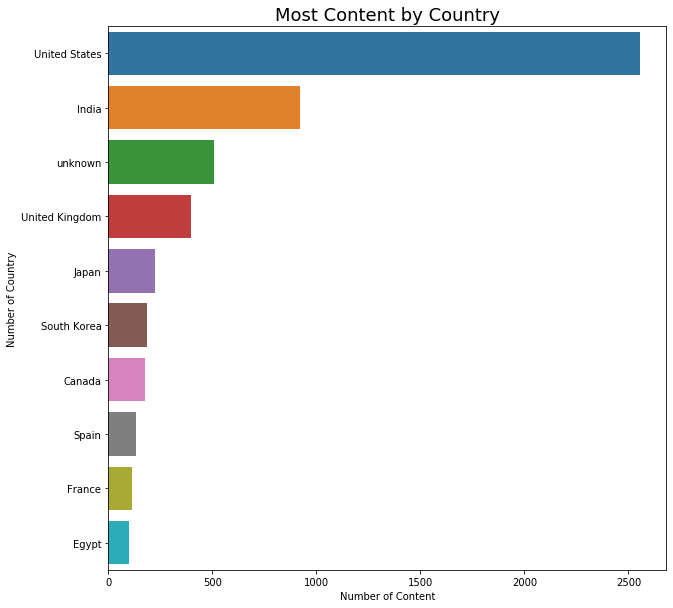

In [ ]:
#Here we see the top 10 countries producing the most content
#As seen from before, Unknown is used to define countries that we don't have information for
x=netflix.country.value_counts().head(10) #for top 10
plt.figure(figsize=(10,10))
ax=sns.countplot(data=netflix,y='country',order=netflix['country'].value_counts().index[0:10])
plt.title('Most Content by Country', fontsize=18)
ax.set_xlabel("Number of Content")
ax.set_ylabel("Number of Country")

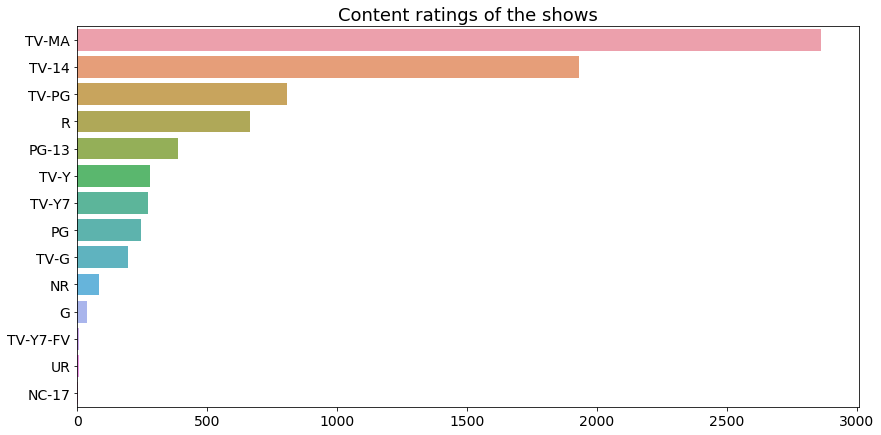

In [ ]:
#Looking at which of the content rating is most common among the shows on Netflix

rating = netflix['rating'].value_counts()

plt.figure(figsize=(14,7))
plt.title('Content ratings of the shows', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=rating.index, x=rating.values, alpha=0.9)

plt.show()

Text(0.5, 1.0, 'Top 10 Highest Content Producing Directors')

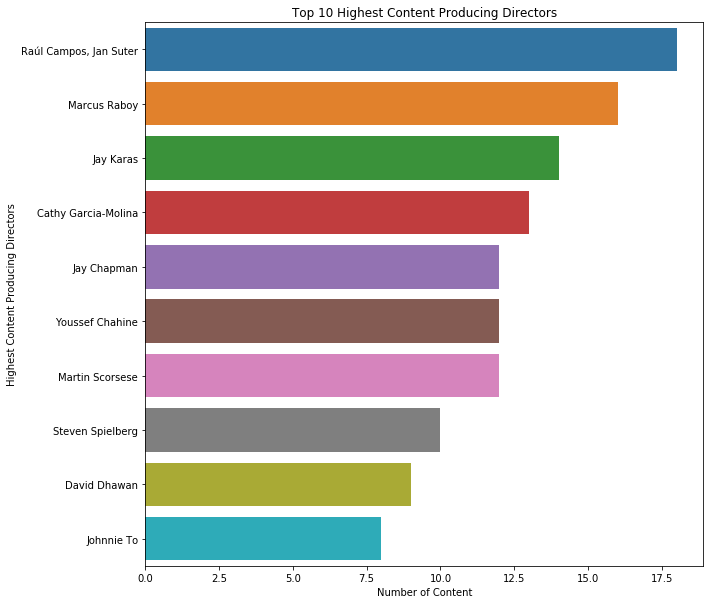

In [ ]:
#Looking at the top 10 highest content producing directors

x=netflix.director.value_counts()
plt.figure(figsize=(10,10))
ax=sns.countplot(data=netflix,y='director',order=netflix['director'].value_counts().index[0:10])
ax.set_xlabel("Number of Content")
ax.set_ylabel("Highest Content Producing Directors")
plt.title('Top 10 Highest Content Producing Directors')

In [ ]:
#Looking at the Map of Movies released based on Countries
import plotly.express as px

fig = px.choropleth(  
    locationmode='country names',
    locations=netflix.country,
    labels=netflix.country
)
fig.show()

Text(0.5, 1.0, 'Different Rated Movie Productions by Year')

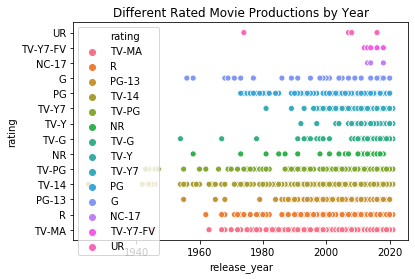

In [ ]:
#Scatter plot of all the MPAA Rating distributions by year
sns.scatterplot(x='release_year', y='rating', data=netflix, hue='rating')
plt.title('Different Rated Movie Productions by Year')

## Story:
### Netflix has become a very popular streaming platform, providing thousands of choices for both television shows and movies. As the platform has been evolving to compete with other streaming services like Hulu, Amazon Prime, and more, it is interesting to see how Netflix has changed its content over time. Through my dashboard, I tried to answer the following simple questions to understand this  larger question:

### - What type of content does Netflix have more of?
### - How much content was released by year?
### - What is the percentage of content released by year?¶
### - What are the number of movies and tv shows produced by year?
### - Which country has the most number of produced content?
### - What MPAA rating is the most common across the Netflix offerings?
### - What director has the most content on Netflix?
### - When was the most Netflix content produced?
### - Which countries produce Netflix content?
### - How are MPAA ratings distributed throughout the years?

###  As we can from the first graphic, nearly 70% of the content on Netflix is TV shows. Most of the content that is on the Netflix platform were released between the years of 2000 and 2020. With the help of the distribution plot, we can see that approximately 26% of the data is comprised of just content released in 2017-2019.  Most of the content released at this time were movies. In regard to the content production, most of the content was made in United States. Next, India has the second most content released. A large portion of the content is rated TV- Mature. Next most common MPAA rating is TV-14. Overall, there is a wide distribution of directors. However, the directors most commonly seen on Netflix are Raul Campos and Jan Suter, followed by Marcus Raboy. Lastly, as seen from the scatterplot, the MPAA ratings have changed in concentration over time. While there were less MPAA ratings recorded early on, especially in the 1940s-1960s, in the later 2000s, there is a wider distribution of MPAA ratings produced. 

###  Overall, from the visualizations produced, we can see that Netflix has provided a wide array of production content over the past few years. Netflix has added more recent content to its library to keep its viewers from all around the world entertained. With content from big producers in their libraries, Netflix has kept its audience hooked. With more movies being produced now than ever before, Netflix may be giving the theaters a tough competition. It will be interesting to see how Netflix continues to evolve, especially in regards to the cast members they bring on for productions. Since I wasn’t able to capture this in my dataset, I would love to look into this further down the road.